# PANDAS is IMPORTANT in Time series!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.__version__

'0.23.0'

In [2]:
ghcn = pd.read_csv("https://raw.githubusercontent.com/story645/ams_tutorials/master/data/nyc_2005_2015.csv")

In [3]:
ghcn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 11 columns):
STATION_NAME    1625 non-null object
DATE            1625 non-null int64
EMXP            1625 non-null int64
MXSD            1625 non-null int64
TPCP            1625 non-null int64
TSNW            1625 non-null int64
EMXT            1625 non-null int64
EMNT            1625 non-null int64
MMXT            1625 non-null int64
MMNT            1625 non-null int64
MNTM            1625 non-null int64
dtypes: int64(10), object(1)
memory usage: 139.7+ KB


In [4]:
ghcn.columns

Index(['STATION_NAME', 'DATE', 'EMXP', 'MXSD', 'TPCP', 'TSNW', 'EMXT', 'EMNT',
       'MMXT', 'MMNT', 'MNTM'],
      dtype='object')

In [5]:
ghcn[['MMNT','TSNW']][5:15:2] #5 to 15 but only the even one)

,MMNT,TSNW
5,48,0
7,-2,53
9,12,13
11,117,0
13,209,0


In [6]:
#ghcn.loc[5:15:2,'TSNW':'MNTM']
ghcn.iloc[5:15:2,5:11] #doing by index



,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
5,0,200,-56,134,48,91
7,53,167,-100,81,-2,40
9,13,217,-56,96,12,54
11,0,289,72,207,117,162
13,0,350,167,289,209,249


In [7]:
ghcn['MMNT'].min(),ghcn['MMNT'].max(),ghcn['MMNT'].mean(),

(-9999, 239, -2825.9304615384617)

In [8]:
ghcn.replace(-9999,np.nan,inplace=True) #replace -9999 with NaN

In [9]:
ghcn.describe()

,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
count,1.625000e+03,1622.000000,987.000000,1622.000000,1320.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000
mean,2.009903e+07,370.113440,49.962513,977.469174,53.769697,255.468858,16.496540,169.991349,84.250865,127.134948
std,2.654034e+04,270.251403,108.166236,665.199628,151.237483,82.013978,96.101295,90.428972,84.560433,87.190188
min,2.005060e+07,0.000000,0.000000,0.000000,0.000000,44.000000,-182.000000,-7.000000,-83.000000,-44.000000
25%,2.008040e+07,208.000000,0.000000,553.000000,0.000000,189.000000,-71.000000,87.750000,4.750000,47.000000
50%,2.010040e+07,305.000000,0.000000,880.500000,0.000000,269.500000,17.000000,176.000000,82.000000,128.000000
75%,2.012070e+07,460.000000,45.500000,1250.000000,5.000000,323.500000,100.000000,255.000000,165.000000,210.250000
max,2.014120e+07,2443.000000,584.000000,4813.000000,1023.000000,539.000000,200.000000,336.000000,239.000000,282.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BD9B347F0>,
      dtype=object)

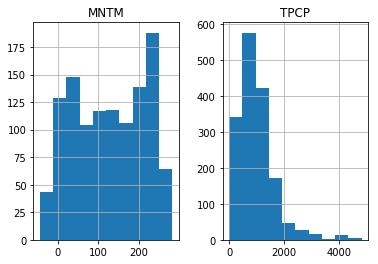

In [10]:
%matplotlib inline 
ghcn[['MNTM','TPCP']].hist()

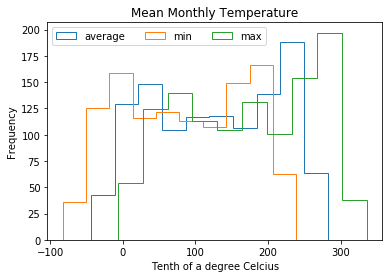

In [11]:
fig, ax = plt.subplots()
_ = ghcn['MNTM'].hist(histtype='step', ax=ax, label='average')
_ = ghcn['MMNT'].hist(histtype='step', ax=ax, label='min')
_ = ghcn['MMXT'].hist(histtype='step', ax=ax, label='max')
_ = ax.legend(loc='upper left',ncol=3)
_ = ax.set_title("Mean Monthly Temperature")
_ = ax.set_xlabel("Tenth of a degree Celcius")
_ = ax.set_ylabel("Frequency")
_ = ax.grid(False)

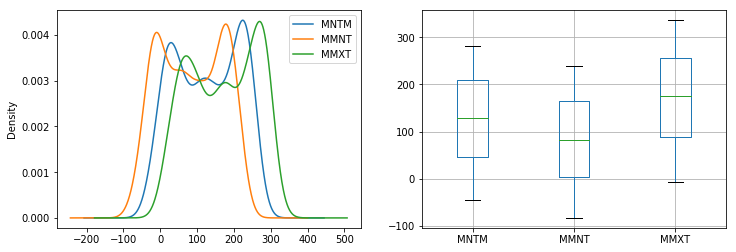

In [12]:
fig, (ax1,ax2) = plt.subplots(figsize=(12,4), ncols =2)
_ = ghcn[['MNTM','MMNT','MMXT']].plot.kde(ax=ax1)
_ = ghcn[['MNTM','MMNT','MMXT']].boxplot(ax=ax2)

In [13]:
ghcn['STATION_NAME'].value_counts() #show # of measurements by Station

CENTERPORT NY US                                    121
NEW YORK LAGUARDIA AIRPORT NY US                    121
FARMINGDALE REPUBLIC AIRPORT NY US                  121
WESTCHESTER CO AIRPORT NY US                        121
NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US     121
NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US    121
BRONX NY US                                         101
DOBBS FERRY ARDSLEY NY US                            83
WANTAGH CEDAR CREEK NY US                            83
MINEOLA NY US                                        83
FLORAL PARK 0.4 W NY US                              81
STATEN ISLAND 4.5 SSE NY US                          60
OCEANSIDE NY US                                      57
LEVITTOWN 0.2 E NY US                                54
STATEN ISLAND 1.4 SE NY US                           41
MIDDLE VILLAGE 0.5 SW NY US                          39
NEW ROCHELLE 1.3 S NY US                             35
WEST NYACK 1.3 WSW NY US                        

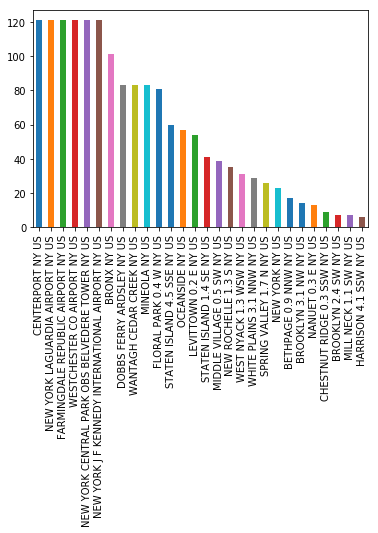

In [14]:
ghcn['STATION_NAME'].value_counts().plot.bar()

In [15]:
ghcn[ghcn['STATION_NAME'].str.contains('HARRISON')]

,STATION_NAME,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
67,HARRISON 4.1 SSW NY US,20090801,414.0,NaN,1427.0,0.0,NaN,NaN,NaN,NaN,NaN
68,HARRISON 4.1 SSW NY US,20090901,185.0,NaN,636.0,0.0,NaN,NaN,NaN,NaN,NaN
69,HARRISON 4.1 SSW NY US,20091001,287.0,NaN,1426.0,0.0,NaN,NaN,NaN,NaN,NaN
70,HARRISON 4.1 SSW NY US,20091101,74.0,NaN,205.0,0.0,NaN,NaN,NaN,NaN,NaN
71,HARRISON 4.1 SSW NY US,20091201,277.0,165.0,1597.0,163.0,NaN,NaN,NaN,NaN,NaN
921,HARRISON 4.1 SSW NY US,20101001,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


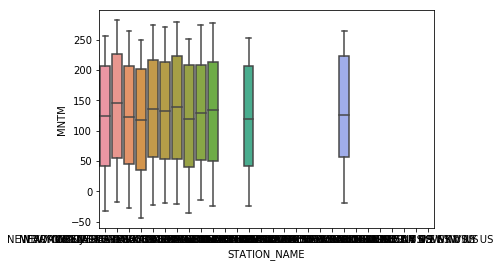

In [16]:
g=sns.boxplot(y='MNTM',x='STATION_NAME',data=ghcn, order =ghcn['STATION_NAME'].value_counts().keys())
_ = g.get_xticklabels(g.get_xticklabels())

In [17]:
ghcn['date']=pd.to_datetime(ghcn['DATE'],format='%Y%m%d')
ghcn['date'].head()

0   2005-06-01
1   2005-07-01
2   2005-08-01
3   2005-09-01
4   2005-10-01
Name: date, dtype: datetime64[ns]

In [18]:
stations = dict(list(ghcn.groupby('STATION_NAME')))
stations.keys()

dict_keys(['BETHPAGE 0.9 NNW NY US', 'BRONX NY US', 'BROOKLYN 2.4 SW NY US', 'BROOKLYN 3.1 NW NY US', 'CENTERPORT NY US', 'CHESTNUT RIDGE 0.3 SSW NY US', 'DOBBS FERRY ARDSLEY NY US', 'FARMINGDALE REPUBLIC AIRPORT NY US', 'FLORAL PARK 0.4 W NY US', 'HARRISON 4.1 SSW NY US', 'LEVITTOWN 0.2 E NY US', 'MIDDLE VILLAGE 0.5 SW NY US', 'MILL NECK 1.1 SW NY US', 'MINEOLA NY US', 'NANUET 0.3 E NY US', 'NEW ROCHELLE 1.3 S NY US', 'NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US', 'NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US', 'NEW YORK LAGUARDIA AIRPORT NY US', 'NEW YORK NY US', 'OCEANSIDE NY US', 'SPRING VALLEY 1.7 N NY US', 'STATEN ISLAND 1.4 SE NY US', 'STATEN ISLAND 4.5 SSE NY US', 'WANTAGH CEDAR CREEK NY US', 'WEST NYACK 1.3 WSW NY US', 'WESTCHESTER CO AIRPORT NY US', 'WHITE PLAINS 3.1 NNW NY US'])

In [19]:
cpd = stations['NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US']
cpd.head()

,STATION_NAME,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM,date
216,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,20050601,150.0,0.0,815.0,0.0,339.0,122.0,279.0,188.0,233.0,2005-06-01
217,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,20050701,386.0,0.0,906.0,0.0,361.0,167.0,294.0,212.0,253.0,2005-07-01
218,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,20050801,787.0,0.0,1007.0,0.0,372.0,183.0,306.0,223.0,265.0,2005-08-01
219,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,20050901,43.0,0.0,121.0,0.0,333.0,100.0,276.0,183.0,229.0,2005-09-01
220,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,20051001,1082.0,0.0,4250.0,0.0,267.0,39.0,176.0,111.0,144.0,2005-10-01


In [22]:
cpd = cpd[['MNTM','date']].set_index(cpd['date'])

In [23]:
#_=cpd.plot()

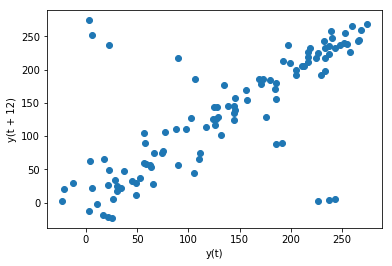

In [27]:
_= pd.plotting.lag_plot(cpd['MNTM'],lag=12) #looking at the relationship between 1 month and the next month, seeing seasonality with lag varies